In [3]:
'''Importando e tratando Dados'''
#importando modulos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as ny

'''Lendo arquivos'''
clientes_df = pd.read_csv(r'/home/seipel/Documents/Python/Projetos Destacados/Mini Projeto Data Science/CadastroClientes.csv', sep = ';')
funcionarios_df = pd.read_csv(r'/home/seipel/Documents/Python/Projetos Destacados/Mini Projeto Data Science/CadastroFuncionarios.csv', sep = ';', decimal = ',')
servicos_df = pd.read_excel(r'/home/seipel/Documents/Python/Projetos Destacados/Mini Projeto Data Science/BaseServiçosPrestados.xlsx')
'''Retirar colunas Estado Civil e Cargo da tabela de funcionarios'''
funcionarios_df = funcionarios_df.drop(columns=['Estado Civil', 'Cargo'])


In [5]:
'''Calcular o Valor Total de Folha Salarial'''
funcionarios_df['Salario Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']
print('Total de Folha Salarial e de R${:,}'.format(sum(funcionarios_df['Salario Total'])))


Total de Folha Salarial e de R$2,717,493.22


In [4]:
'''Faturamento da Empresa'''
faturamento_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']], on= 'ID Cliente')
faturamento_df['Faturamento Total'] = faturamento_df['Tempo Total de Contrato (Meses)'] * faturamento_df['Valor Contrato Mensal']
print('O Faturamento Total da Empresa foi de R${:,}'.format(sum(faturamento_df['Faturamento Total'])))

O Faturamento Total da Empresa foi de R$5,519,160


In [16]:
'''Qual a Porcentagem de funcionarios que ja fechou algum contrato?'''
qtde_funcionario_fecharamcontrato = len(servicos_df['ID Funcionário'].unique())
qtde_funcionario_total = len(funcionarios_df['ID Funcionário'])
porcentagem = qtde_funcionario_fecharamcontrato / qtde_funcionario_total
print('A porcentagem de funcionarios que fecharam contrato foi {:.2%}'.format(porcentagem))


A porcentagem de funcionarios que fecharam contrato foi 86.84%


<AxesSubplot:>

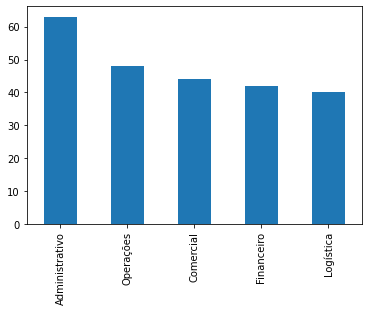

In [29]:
'''Quantidade  de contratos por Area'''
contratos_area_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on = 'ID Funcionário')
contratos_area_qtde = contratos_area_df['Area'].value_counts()
contratos_area_qtde.plot(kind='bar')


<AxesSubplot:>

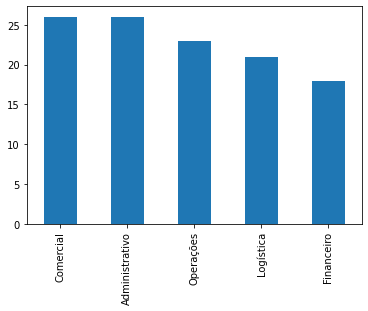

In [26]:
'''Funcionarios por Area'''
fucionarios_area = funcionarios_df['Area'].value_counts()
fucionarios_area.plot(kind= 'bar')

In [35]:
'''Valor de Tickete Medio Mensal'''
ticket_mediMesal = clientes_df['Valor Contrato Mensal'].mean()
print('O ticket Medio Mensal da Empresa e: R$ {:,.2f}'.format(ticket_mediMesal))

O ticket Medio Mensal da Empresa e: R$ 2,502.56
